In [1]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from scipy import io
import math

## Question 2: Partioning

In [2]:
complete_dataset = {}

for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    
    complete_dataset[data_name] = {}
    
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)
        complete_dataset[data_name][field] = data[field]


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


In [3]:
def partitionDataSet(training_data, training_labels, length):
    totalSet = np.concatenate((training_data, \
                               training_labels), axis=1)
    np.random.shuffle(totalSet)    
    
    return totalSet[0:length, :], totalSet[length:, :]

from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

def createHogFeature(data, x, y, multi):
    featurevec = None
    for row in range(0, data.shape[0]):
        if row % 1000 == 0:
            print(f"finished {row}", end=' ')
        
        if multi:
            img = data[row,:].reshape(3, x,y).T
        else:
            img = data[row,:].reshape(x,y)
            
        fd, _ = hog(img, visualize=True, feature_vector=True, multichannel=multi)
        if featurevec is None:
            featurevec = fd.reshape(1, fd.shape[0])
        else:
            featurevec = np.concatenate((featurevec, fd.reshape(1,fd.shape[0])), axis=0)
            
    return featurevec

In [4]:
#Partioning MNIST dataset
print("MNIST Dataset: ")

  ## Standardization
scaler = StandardScaler()
#scaler.fit_transform
mnist_training_std = scaler.fit_transform(createHogFeature(complete_dataset["mnist"]["training_data"], 28, 28, False))

mnist_validation, mnist_training = partitionDataSet(mnist_training_std, \
                               complete_dataset["mnist"]["training_labels"], 10000)

mnist_validation_x = mnist_validation[:, :-1]
mnist_validation_y = mnist_validation[:, -1:]
print(f"Validation X: {mnist_validation_x.shape} \nValidation Y: {mnist_validation_y.shape}")

mnist_training_x = mnist_training[:, :-1]
mnist_training_y = mnist_training[:, -1:]
print(f"Training X: {mnist_training_x.shape} \nTraining Y: {mnist_training_y.shape}")

MNIST Dataset: 
finished 0 finished 1000 finished 2000 finished 3000 finished 4000 finished 5000 finished 6000 finished 7000 finished 8000 finished 9000 finished 10000 finished 11000 finished 12000 finished 13000 finished 14000 finished 15000 finished 16000 finished 17000 finished 18000 finished 19000 finished 20000 finished 21000 finished 22000 finished 23000 finished 24000 finished 25000 finished 26000 finished 27000 finished 28000 finished 29000 finished 30000 finished 31000 finished 32000 finished 33000 finished 34000 finished 35000 finished 36000 finished 37000 finished 38000 finished 39000 finished 40000 finished 41000 finished 42000 finished 43000 finished 44000 finished 45000 finished 46000 finished 47000 finished 48000 finished 49000 finished 50000 finished 51000 finished 52000 finished 53000 finished 54000 finished 55000 finished 56000 finished 57000 finished 58000 finished 59000 Validation X: (10000, 81) 
Validation Y: (10000, 1)
Training X: (50000, 81) 
Training Y: (50000, 

In [5]:
#Partioning spam dataset
print("Spam dataset")
partition_length = math.ceil(complete_dataset["spam"]["training_data"].shape[0]*0.2)

spam_validation, spam_training = partitionDataSet(complete_dataset["spam"]["training_data"], \
                               complete_dataset["spam"]["training_labels"], partition_length)

spam_validation_x = spam_validation[:, :-1]
spam_validation_y = spam_validation[:, -1:]
print(f"Validation X: {spam_validation_x.shape} \nValidation Y: {spam_validation_y.shape}")

spam_training_x = spam_training[:, :-1]
spam_training_y = spam_training[:, -1:]
print(f"Training X: {spam_training_x.shape} \nTraining Y: {spam_training_y.shape}")

Spam dataset
Validation X: (1035, 32) 
Validation Y: (1035, 1)
Training X: (4137, 32) 
Training Y: (4137, 1)


In [6]:
#Partioning CIFAR-10 dataset
print("CIFAR-10 dataset")
scaler = StandardScaler()
#scaler.fit_transform
cifar_training_hog = createHogFeature(complete_dataset["cifar10"]["training_data"], 32, 32, True)
cifar_training_std = scaler.fit_transform(cifar_training_hog)

cifar_validation, cifar_training = partitionDataSet(cifar_training_hog, \
                               complete_dataset["cifar10"]["training_labels"], 10000)


cifar_validation_x = cifar_validation[:, :-1]
cifar_validation_y = cifar_validation[:, -1:]
print(f"Validation X: {cifar_validation_x.shape} \nValidation Y: {cifar_validation_y.shape}")

cifar_training_x = cifar_training[:, :-1]
cifar_training_y = cifar_training[:, -1:]
print(f"Training X: {cifar_training_x.shape} \nTraining Y: {cifar_training_y.shape}")

CIFAR-10 dataset
finished 0 finished 1000 finished 2000 finished 3000 finished 4000 finished 5000 finished 6000 finished 7000 finished 8000 finished 9000 finished 10000 finished 11000 finished 12000 finished 13000 finished 14000 finished 15000 finished 16000 finished 17000 finished 18000 finished 19000 finished 20000 finished 21000 finished 22000 finished 23000 finished 24000 finished 25000 finished 26000 finished 27000 finished 28000 finished 29000 finished 30000 finished 31000 finished 32000 finished 33000 finished 34000 finished 35000 finished 36000 finished 37000 finished 38000 finished 39000 finished 40000 finished 41000 finished 42000 finished 43000 finished 44000 finished 45000 finished 46000 finished 47000 finished 48000 finished 49000 Validation X: (10000, 324) 
Validation Y: (10000, 1)
Training X: (40000, 324) 
Training Y: (40000, 1)


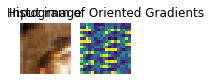

In [7]:
#Plotting Cifar Image vs. its HOG feature

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2, 1), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(complete_dataset["cifar10"]["training_data"][0,:].reshape(3,32,32).T, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(cifar_training_hog[0,:].reshape(18,18))
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## Question 3, 4 for MNIST Handrwritten Digit Classification

Creating SVC Model and training

In [8]:
#Training on MNIST Dataset

mnist_clf = svm.SVC(kernel='linear')

training_ints = [100, 200, 500, 1000, 2000, 5000, 10000]
accuracies = {"train": [], "val": []}

for num_training in training_ints:
    
    print(f"Training with {num_training} examples")
    
    training_y = np.asarray(mnist_training_y).reshape(-1)
    validation_y = np.asarray(mnist_validation_y).reshape(-1)
    
    mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])
    
    
    training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
    val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))
    
    accuracies["train"].append(training_acc)
    accuracies["val"].append(val_acc)
    
    print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")


Training with 100 examples
Training accuracy: 0.75832 
Validation Accuracy: 0.7589

Training with 200 examples
Training accuracy: 0.82444 
Validation Accuracy: 0.8277

Training with 500 examples
Training accuracy: 0.87138 
Validation Accuracy: 0.8739

Training with 1000 examples
Training accuracy: 0.89588 
Validation Accuracy: 0.8965

Training with 2000 examples
Training accuracy: 0.90944 
Validation Accuracy: 0.9079

Training with 5000 examples
Training accuracy: 0.92726 
Validation Accuracy: 0.9188

Training with 10000 examples
Training accuracy: 0.9432 
Validation Accuracy: 0.9326



**Plotting Training/Validation Accuracy vs. Num Examples Trained with**

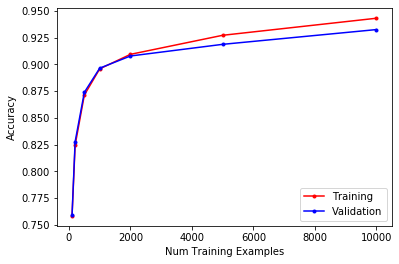

In [9]:
plt.plot(training_ints, accuracies["train"], '.r-')
plt.plot(training_ints, accuracies["val"], '.b-')
plt.legend(['Training', 'Validation'], loc=4)
plt.xlabel("Num Training Examples")
plt.ylabel("Accuracy")
plt.show()

In [10]:
# from save_csv import *
# results_to_csv(mnist_clf.predict(complete_dataset["mnist"]["test_data"]))

**Tuning regularization hyperparameter and choosing best one:**

In [11]:
Cs = [0.00001 * math.pow(10, x) for x in range(0, 8)]
num_training = 2000
accuraciesC = {"train": [], "val": []}
for c in Cs:
    print(f"Training with regularlization param {c}")
    mnist_clf = svm.SVC(kernel='linear', C=c)
    
    training_y = np.asarray(mnist_training_y).reshape(-1)
    validation_y = np.asarray(mnist_validation_y).reshape(-1)
    
    mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])
    
    training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
    val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))
    
    accuraciesC["train"].append(training_acc)
    accuraciesC["val"].append(val_acc)
    
    print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training with regularlization param 1e-05
Training accuracy: 0.11158 
Validation Accuracy: 0.1163

Training with regularlization param 0.0001
Training accuracy: 0.3677 
Validation Accuracy: 0.3734

Training with regularlization param 0.001
Training accuracy: 0.90194 
Validation Accuracy: 0.9003

Training with regularlization param 0.01
Training accuracy: 0.93156 
Validation Accuracy: 0.9287

Training with regularlization param 0.1
Training accuracy: 0.92118 
Validation Accuracy: 0.92

Training with regularlization param 1.0
Training accuracy: 0.90944 
Validation Accuracy: 0.9079

Training with regularlization param 10.0
Training accuracy: 0.90894 
Validation Accuracy: 0.9077

Training with regularlization param 100.00000000000001
Training accuracy: 0.90894 
Validation Accuracy: 0.9077



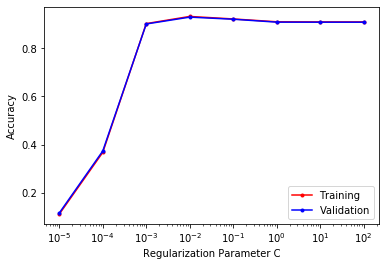

Best C for training: 0.01, Best C for validation: 0.01


In [12]:
plt.plot(Cs, accuraciesC["train"], '.r-')
plt.plot(Cs, accuraciesC["val"], '.b-')

ax = plt.gca()
ax.set_xscale('log')
plt.legend(['Training', 'Validation'], loc=4)
plt.xlabel("Regularization Parameter C")
plt.ylabel("Accuracy")

plt.show()

maxCtrain = max(zip(Cs,accuraciesC["train"]), key=lambda x: x[1])[0]
maxCval = max(zip(Cs,accuraciesC["train"]), key=lambda x: x[1])[0]

print(f"Best C for training: {maxCtrain}, Best C for validation: {maxCval}")

**Using best C and training on 30,000 examples:**

In [13]:
num_training = 20000
mnist_clf = svm.SVC(kernel='linear', C=100)
    
training_y = np.asarray(mnist_training_y).reshape(-1)
validation_y = np.asarray(mnist_validation_y).reshape(-1)

mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])


training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))

# accuracies["train"].append(training_acc)
# accuracies["val"].append(val_acc)

print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training accuracy: 0.954 
Validation Accuracy: 0.9349



**Running best MNIST linear SVM model on test set and saving predictions:**

In [14]:
from save_csv import *
results_to_csv(mnist_clf.predict(scaler.fit_transform(createHogFeature(complete_dataset["mnist"]["test_data"], 28, 28, False))))

### Using Non-linear SVM Classifier

Training with regularlization param 1e-05
Training accuracy: 0.11158 
Validation Accuracy: 0.1163

Training with regularlization param 0.0001
Training accuracy: 0.11158 
Validation Accuracy: 0.1163

Training with regularlization param 0.001
Training accuracy: 0.11164 
Validation Accuracy: 0.1164

Training with regularlization param 0.01
Training accuracy: 0.13222 
Validation Accuracy: 0.1366

Training with regularlization param 0.1
Training accuracy: 0.56316 
Validation Accuracy: 0.5657

Training with regularlization param 1.0
Training accuracy: 0.89152 
Validation Accuracy: 0.8892

Training with regularlization param 10.0
Training accuracy: 0.92748 
Validation Accuracy: 0.9264

Training with regularlization param 100.00000000000001
Training accuracy: 0.92872 
Validation Accuracy: 0.9273



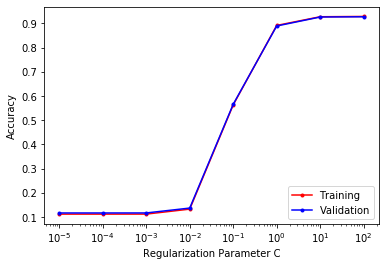

Best C for training: 100.00000000000001, Best C for validation: 100.00000000000001


In [14]:
Cs = [0.00001 * math.pow(10, x) for x in range(0, 8)]
num_training = 2000
accuraciesC = {"train": [], "val": []}
for c in Cs:
    print(f"Training with regularlization param {c}")
    mnist_clf = svm.SVC(kernel='poly', C=c)
    
    training_y = np.asarray(mnist_training_y).reshape(-1)
    validation_y = np.asarray(mnist_validation_y).reshape(-1)
    
    mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])
    
    training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
    val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))
    
    accuraciesC["train"].append(training_acc)
    accuraciesC["val"].append(val_acc)
    
    print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")
    
plt.plot(Cs, accuraciesC["train"], '.r-')
plt.plot(Cs, accuraciesC["val"], '.b-')

ax = plt.gca()
ax.set_xscale('log')
plt.legend(['Training', 'Validation'], loc=4)
plt.xlabel("Regularization Parameter C")
plt.ylabel("Accuracy")

plt.show()

maxCtrain = max(zip(Cs,accuraciesC["train"]), key=lambda x: x[1])[0]
maxCval = max(zip(Cs,accuraciesC["train"]), key=lambda x: x[1])[0]

print(f"Best C for training: {maxCtrain}, Best C for validation: {maxCval}")

In [15]:
num_training = 30000
mnist_clf = svm.SVC(kernel='poly', C=100)
    
training_y = np.asarray(mnist_training_y).reshape(-1)
validation_y = np.asarray(mnist_validation_y).reshape(-1)

mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])


training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))

# accuracies["train"].append(training_acc)
# accuracies["val"].append(val_acc)

print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training accuracy: 0.9877 
Validation Accuracy: 0.9701



**Running best MNIST nonlinear SVM model on test set and saving predictions:**

In [92]:
results_to_csv(mnist_clf.predict(scaler.fit_transform(createHogFeature(complete_dataset["mnist"]["test_data"], 28, 28, False))))

finished 0 finished 1000 finished 2000 finished 3000 finished 4000 finished 5000 finished 6000 finished 7000 finished 8000 finished 9000 

## Question 3,5 for Spam/Ham Classification

In [16]:
#Training on Spam/Ham Dataset

spam_clf = svm.SVC(kernel='linear')

training_ints = [100, 200, 500, 1000, 2000, spam_training_x.shape[0]]
accuraciesSpam = {"train": [], "val": []}

for num_training in training_ints:
    
    print(f"Training with {num_training} examples")
    
    training_y = np.asarray(spam_training_y).reshape(-1)
    validation_y = np.asarray(spam_validation_y).reshape(-1)
    
    spam_clf.fit(spam_training_x[:num_training, :], training_y[:num_training])
    
    
    training_acc = metrics.accuracy_score(training_y, spam_clf.predict(spam_training_x))
    val_acc = metrics.accuracy_score(validation_y, spam_clf.predict(spam_validation_x))
    
    accuraciesSpam["train"].append(training_acc)
    accuraciesSpam["val"].append(val_acc)
    
    print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training with 100 examples
Training accuracy: 0.7457094512932076 
Validation Accuracy: 0.7603864734299517

Training with 200 examples
Training accuracy: 0.7921198936427363 
Validation Accuracy: 0.8057971014492754

Training with 500 examples
Training accuracy: 0.797196035774716 
Validation Accuracy: 0.8154589371980676

Training with 1000 examples
Training accuracy: 0.8039642252840222 
Validation Accuracy: 0.8241545893719807

Training with 2000 examples
Training accuracy: 0.8104906937394247 
Validation Accuracy: 0.8309178743961353

Training with 4137 examples
Training accuracy: 0.8008218515832729 
Validation Accuracy: 0.821256038647343



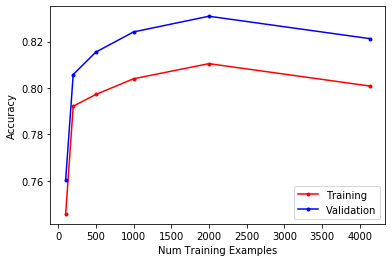

In [17]:
plt.plot(training_ints, accuraciesSpam["train"], '.r-')
plt.plot(training_ints, accuraciesSpam["val"], '.b-')
plt.legend(['Training', 'Validation'], loc=4)
plt.xlabel("Num Training Examples")
plt.ylabel("Accuracy")
plt.show()

In [18]:
spam_trainingFull_x = np.concatenate((spam_training_x, spam_validation_x), axis=0)
spam_trainingFull_y = np.concatenate((spam_training_y, spam_validation_y), axis=0)
spam_trainingFull = np.concatenate((spam_trainingFull_x, spam_trainingFull_y), axis=1)

shuffled_indices = list(range(0, spam_trainingFull.shape[0]))
np.random.shuffle(shuffled_indices)

k = 5
lenPartition = math.floor(len(shuffled_indices) / k)
partitions = []
for i in range(0, k):
    if (i != k - 1):
        partitions.append(shuffled_indices[i*lenPartition:(i+1)*lenPartition])
    else:
        partitions.append(shuffled_indices[i*lenPartition:])

In [19]:
Cs = [0.00001 * math.pow(10, x) for x in range(0, 8)]
accuraciesSpamC = []
for c in Cs:
    cv_accuracy_val = 0
    print(f"Training spam using C={c}")
    for i in range(0, k):
        print(f"K-Fold iteration {i+1}")
        spam_clf = svm.SVC(kernel='linear', C=c)
        
        spam_training = spam_trainingFull[[ind for x in range(0, k) for ind in partitions[x] if x != i], :]
        spam_training_x, spam_training_y = spam_training[:, :-1], spam_training[:, -1:]
        spam_valdation = spam_trainingFull[partitions[i], :]
        spam_valdation_x, spam_valdation_y = spam_valdation[:, :-1], spam_valdation[:, -1:]
        
        
        training_y = np.asarray(spam_training_y).reshape(-1)
        validation_y = np.asarray(spam_validation_y).reshape(-1)
        
        spam_clf.fit(spam_training_x, training_y)
    
        val_acc = metrics.accuracy_score(validation_y, spam_clf.predict(spam_validation_x))
        print(f"Validation accuracy: {val_acc}\n")
    
        cv_accuracy_val = cv_accuracy_val + val_acc
        
    print(f"Cross validation accuracy: {cv_accuracy_val / k}\n")
    accuraciesSpamC.append(cv_accuracy_val / k)
        
        
        
        
        
        

Training spam using C=1e-05
K-Fold iteration 1
Validation accuracy: 0.7111111111111111

K-Fold iteration 2
Validation accuracy: 0.7111111111111111

K-Fold iteration 3
Validation accuracy: 0.7111111111111111

K-Fold iteration 4
Validation accuracy: 0.7111111111111111

K-Fold iteration 5
Validation accuracy: 0.7111111111111111

Cross validation accuracy: 0.7111111111111111

Training spam using C=0.0001
K-Fold iteration 1
Validation accuracy: 0.7236714975845411

K-Fold iteration 2
Validation accuracy: 0.7256038647342995

K-Fold iteration 3
Validation accuracy: 0.7227053140096619

K-Fold iteration 4
Validation accuracy: 0.7246376811594203

K-Fold iteration 5
Validation accuracy: 0.7236714975845411

Cross validation accuracy: 0.7240579710144928

Training spam using C=0.001
K-Fold iteration 1
Validation accuracy: 0.7632850241545893

K-Fold iteration 2
Validation accuracy: 0.7603864734299517

K-Fold iteration 3
Validation accuracy: 0.7623188405797101

K-Fold iteration 4
Validation accuracy: 0

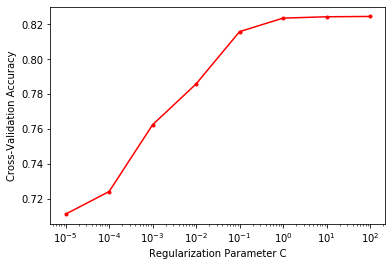

Best C for cross-validation: 100.00000000000001


In [20]:
plt.plot(Cs, accuraciesSpamC, '.r-')

ax = plt.gca()
ax.set_xscale('log')

plt.xlabel("Regularization Parameter C")
plt.ylabel("Cross-Validation Accuracy")

plt.show()

pp = max(zip(Cs,accuraciesSpamC), key=lambda x: x[1])[0]

print(f"Best C for cross-validation: {pp}")

In [21]:
partition_length = math.ceil(complete_dataset["spam"]["training_data"].shape[0]*0.2)
spam_validation, spam_training = partitionDataSet(complete_dataset["spam"]["training_data"], \
                               complete_dataset["spam"]["training_labels"], partition_length)

spam_validation_x = spam_validation[:, :-1]
spam_validation_y = spam_validation[:, -1:]
spam_training_x = spam_training[:, :-1]
spam_training_y = spam_training[:, -1:]

spam_clf = svm.SVC(kernel='linear', C=100)

training_y = np.asarray(spam_training_y).reshape(-1)
validation_y = np.asarray(spam_validation_y).reshape(-1)

spam_clf.fit(spam_training_x, training_y)

training_acc = metrics.accuracy_score(training_y, spam_clf.predict(spam_training_x))
val_acc = metrics.accuracy_score(validation_y, spam_clf.predict(spam_validation_x))
    
print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training accuracy: 0.8032390621223109 
Validation Accuracy: 0.8241545893719807



**Using best classifier on spam test set and saving**

In [65]:
results_to_csv(spam_clf.predict(complete_dataset["spam"]["test_data"]))

## Question 3 for CIFAR-10 Image Classification

In [22]:
#Training on CIFAR-10 Dataset

cifar_clf = svm.SVC(kernel='linear')

training_ints = [100, 200, 500, 1000, 2000, 5000, 10000]
accuraciesCifar = {"train": [], "val": []}

for num_training in training_ints:
    
    print(f"Training with {num_training} examples")
    
    training_y = np.asarray(cifar_training_y).reshape(-1)
    validation_y = np.asarray(cifar_validation_y).reshape(-1)
    
    cifar_clf.fit(cifar_training_x[:num_training, :], training_y[:num_training])
    
    
    training_acc = metrics.accuracy_score(training_y, cifar_clf.predict(cifar_training_x))
    val_acc = metrics.accuracy_score(validation_y, cifar_clf.predict(cifar_validation_x))
    
    accuraciesCifar["train"].append(training_acc)
    accuraciesCifar["val"].append(val_acc)
    
    print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training with 100 examples
Training accuracy: 0.303775 
Validation Accuracy: 0.3

Training with 200 examples
Training accuracy: 0.353825 
Validation Accuracy: 0.3567

Training with 500 examples
Training accuracy: 0.3967 
Validation Accuracy: 0.4001

Training with 1000 examples
Training accuracy: 0.429425 
Validation Accuracy: 0.4296

Training with 2000 examples
Training accuracy: 0.469275 
Validation Accuracy: 0.4666

Training with 5000 examples
Training accuracy: 0.5038 
Validation Accuracy: 0.5026

Training with 10000 examples
Training accuracy: 0.5282 
Validation Accuracy: 0.5186



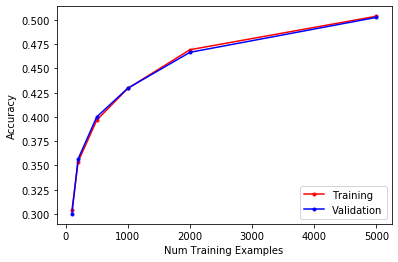

In [23]:
plt.plot(training_ints[:-1], accuraciesCifar["train"][:-1], '.r-')
plt.plot(training_ints[:-1], accuraciesCifar["val"][:-1], '.b-')
plt.legend(['Training', 'Validation'], loc=4)
plt.xlabel("Num Training Examples")
plt.ylabel("Accuracy")
plt.show()

In [24]:
num_training = 25000
cifar_clf = svm.SVC(kernel='linear', C=1)
    
training_y = np.asarray(cifar_training_y).reshape(-1)
validation_y = np.asarray(cifar_validation_y).reshape(-1)

cifar_clf.fit(cifar_training_x[:num_training, :], training_y[:num_training])


training_acc = metrics.accuracy_score(training_y, cifar_clf.predict(cifar_training_x))
val_acc = metrics.accuracy_score(validation_y, cifar_clf.predict(cifar_validation_x))

print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training accuracy: 0.543175 
Validation Accuracy: 0.5292



In [11]:
from save_csv import *
results_to_csv(cifar_clf.predict(scaler.fit_transform(createHogFeature(complete_dataset["cifar10"]["test_data"], 32, 32, True))))

finished 0 finished 1000 finished 2000 finished 3000 finished 4000 finished 5000 finished 6000 finished 7000 finished 8000 finished 9000 